In [1]:
from feature_26_generation import *
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None  # to remove warning
warnings.filterwarnings(action='ignore', message='Mean of empty slice')
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
paths_finished = load('paths_finished')
paths_unfinished = load('paths_unfinished')
shortest_path_distance_matrix = load('shortest_path_matrix')
articles = load_articles()

# Features 2 : Path length and player persistence

In [3]:
paths_finished_copy = paths_finished.copy(deep=True)

paths_finished_with_path_length, mean_optimal_path_length_f = add_path_length(paths_finished_copy, articles, shortest_path_distance_matrix, True)
paths_finished_with_path_length

100%|███████████████████████████████████████████████████████████████████████████| 51318/51318 [02:36<00:00, 327.53it/s]
Mean optimal path length: 2.85


,hashedIpAddress,timestamp,durationInSec,path,rating,path_length,optimal_path_length
0,6a3701d319fc3754,2011-02-15 03:26:49,166,"[14th_century, 15th_century, 16th_century, Pac...",NaN,9,3.0
1,3824310e536af032,2012-08-12 06:36:52,88,"[14th_century, Europe, Africa, Atlantic_slave_...",3.0,5,3.0
2,415612e93584d30e,2012-10-03 21:10:40,138,"[14th_century, Niger, Nigeria, British_Empire,...",NaN,8,3.0
3,64dd5cd342e3780c,2010-02-08 07:25:25,37,"[14th_century, Renaissance, Ancient_Greece, Gr...",NaN,4,2.0
4,015245d773376aab,2013-04-23 15:27:08,175,"[14th_century, Italy, Roman_Catholic_Church, H...",3.0,7,3.0
...,...,...,...,...,...,...,...
51313,15a13a1d66ef5456,2012-10-03 02:23:35,66,"[Yagan, Ancient_Egypt, Civilization]",NaN,3,2.0
51314,2ef7ac844cefda58,2011-03-16 05:42:18,165,"[Yagan, Folklore, Brothers_Grimm, 19th_century...",3.0,8,3.0
51315,12863abb7887f890,2013-11-22 04:42:52,228,"[Yagan, Australia, England, France, United_Sta...",NaN,7,3.0
51316,19f8284371753362,2011-02-27 07:42:47,56,"[Yarralumla%2C_Australian_Capital_Territory, A...",1.0,4,2.0


In [4]:
paths_unfinished_copy = paths_unfinished.copy(deep=True)
paths_unfinished_with_path_length, mean_optimal_path_length_u = add_path_length(paths_unfinished_copy, articles, shortest_path_distance_matrix, False)
paths_unfinished_with_path_length
#.split(";")

100%|███████████████████████████████████████████████████████████████████████████| 24846/24846 [01:19<00:00, 313.74it/s]
Mean optimal path length: 3.23


,hashedIpAddress,timestamp,durationInSec,path,target,type,path_length,optimal_path_length
0,2426091a53125110,2011-02-07 05:02:15,1804,[Obi-Wan_Kenobi],Microsoft,timeout,1,3.0
1,26141fd878806294,2011-02-07 05:14:11,1805,[Julius_Caesar],Caracas,timeout,1,3.0
2,2b015fb8181c48f2,2011-02-07 15:00:19,1818,"[Malawi, Democracy, Alexander_the_Great]",First_Crusade,timeout,3,3.0
3,53a53bc244e08a6a,2011-02-07 16:06:01,49,[Paraguay],Mount_St._Helens,restart,1,3.0
4,53a53bc244e08a6a,2011-02-07 17:18:25,1808,"[Paraguay, Bolivia]",Mount_St._Helens,timeout,2,3.0
...,...,...,...,...,...,...,...,...
24870,109ed71f571d86e9,2014-01-15 12:06:45,180,"[Franz_Kafka, Tuberculosis, World_Health_Organ...",Cholera,restart,7,3.0
24871,232f992e57d43e8d,2014-01-15 12:08:17,6,[Modern_history],Hollandic,restart,1,3.0
24872,2e09a7224600a7cd,2014-01-15 15:06:40,1900,"[Computer_programming, Linguistics, Culture, P...",The_Beatles,timeout,4,3.0
24873,60af9e2138051b96,2014-01-15 15:24:41,1903,"[Jamaica, United_Kingdom, World_War_II, Battle...",Alan_Turing,timeout,4,3.0


# Features 6: Position of clicked link on the article

In [3]:
paths_finished_copy = paths_finished.copy(deep=True)

df = add_link_position(paths_finished_copy, True)
df

  8%|█████▊                                                                    | 3991/51318 [00:00<00:02, 19955.76it/s]

C:\Users\mathi\anaconda3\envs\ada\lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


100%|█████████████████████████████████████████████████████████████████████████| 51318/51318 [00:02<00:00, 19518.92it/s]


In [7]:
df[df['position_mean'].isna()]

,hashedIpAddress,timestamp,durationInSec,path,rating,position_mean,position_std
8,08888b1b428dd90e,2009-01-18 01:18:30,74,"[14th_century, Time, Light, Rainbow]",3.0,NaN,NaN
12,390ae528683f78ab,2009-08-20 00:14:12,66,"[14th_century, Time, Astronomy, Light, Rainbow]",NaN,NaN,NaN
22,1c6947833f8d7a1e,2012-08-21 04:14:26,75,"[14th_century, Time, Light, Rainbow]",1.0,NaN,NaN
23,1c6947833f8d7a1e,2012-08-21 04:41:47,25,"[14th_century, Time, Light, Rainbow]",NaN,NaN,NaN
29,4d4b3e8b7b19bb3d,2012-09-20 21:55:32,70,"[14th_century, Time, Light, Rainbow]",NaN,NaN,NaN
...,...,...,...,...,...,...,...
51203,12ba422d3771b622,2009-11-26 04:00:09,8,"[Rubik%27s_Cube, Algorithm]",NaN,NaN,NaN
51204,12ba422d3771b622,2009-11-26 04:00:32,4,"[Rubik%27s_Cube, Algorithm]",NaN,NaN,NaN
51253,0ec45a9c58fce139,2013-05-10 18:56:46,154,"[Starship_Troopers, Mathematics]",1.0,NaN,NaN
51307,69d6678337665564,2011-06-23 13:11:34,37,"[William_Thomson%2C_1st_Baron_Kelvin, Astronom...",NaN,NaN,NaN


# to see distribution :

In [40]:
df['positions_of_all_links'] = pd.Series(dtype='object')
#  Transform next link positions (remove zeros and plug into dataframe for each path)
for i in tqdm(range(len(next_link_position))):
    df['positions_of_all_links'][i] = [np.trim_zeros(next_link_position[i,:])]
    #df['positions_of_all_links'][i] = [(next_link_position[i,:])]

df

100%|██████████████████████████████████████████████████████████████████████████| 51318/51318 [00:12<00:00, 4081.79it/s]


,hashedIpAddress,timestamp,durationInSec,path,rating,link_position,positions_of_all_links
0,6a3701d319fc3754,2011-02-15 03:26:49,166,"[14th_century, 15th_century, 16th_century, Pac...",NaN,0.127475,"[[0.0366062264796442, 0.024794345962229174, 0...."
1,3824310e536af032,2012-08-12 06:36:52,88,"[14th_century, Europe, Africa, Atlantic_slave_...",3.0,0.202398,"[[0.18645227505987, 0.03309989824624409, 0.233..."
2,415612e93584d30e,2012-10-03 21:10:40,138,"[14th_century, Niger, Nigeria, British_Empire,...",NaN,0.225906,"[[0.39822100581594255, 0.05962138246173932, 0...."
3,64dd5cd342e3780c,2010-02-08 07:25:25,37,"[14th_century, Renaissance, Ancient_Greece, Gr...",NaN,0.223735,"[[0.4468012316113582, 0.0, 0.00066786689122480..."
4,015245d773376aab,2013-04-23 15:27:08,175,"[14th_century, Italy, Roman_Catholic_Church, H...",3.0,0.171399,"[[0.17139924734861445, 0.06520291106451215, 0...."
...,...,...,...,...,...,...,...
51313,15a13a1d66ef5456,2012-10-03 02:23:35,66,"[Yagan, Ancient_Egypt, Civilization]",NaN,NaN,[[]]
51314,2ef7ac844cefda58,2011-03-16 05:42:18,165,"[Yagan, Folklore, Brothers_Grimm, 19th_century...",3.0,0.347843,"[[0.10423093873953283, 0.703962703962704, 0.57..."
51315,12863abb7887f890,2013-11-22 04:42:52,228,"[Yagan, Australia, England, France, United_Sta...",NaN,0.137848,"[[0.029965870307167235, 0.14230443078227686, 0..."
51316,19f8284371753362,2011-02-27 07:42:47,56,"[Yarralumla%2C_Australian_Capital_Territory, A...",1.0,0.153554,"[[0.0013256087981146896, 0.3057822768708925]]"


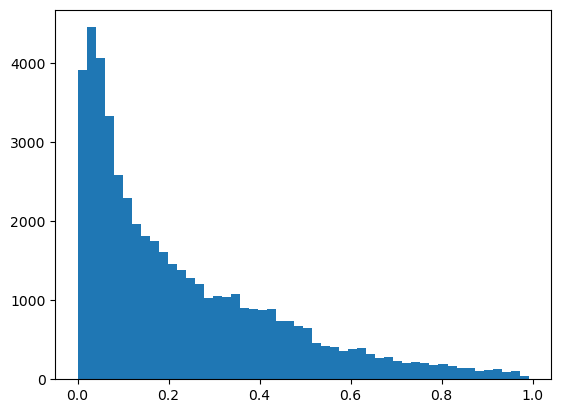

In [41]:
plt.hist(position_series_median_per_path, bins = 50)
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:55<00:00, 54.29it/s]


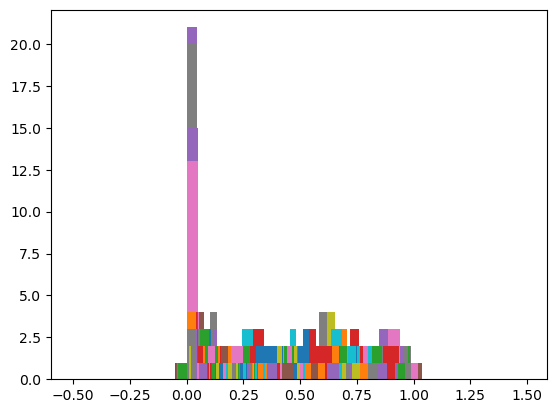

In [45]:
dff = df.sample(n=3000)
dff = dff.reset_index(drop=True)
for i in tqdm(range(len(dff))):
    plt.hist(dff['positions_of_all_links'][i], bins = 20)
plt.show()

In [7]:
paths_unfinished_copy = paths_unfinished.copy(deep=True)

df_u = add_link_position(paths_unfinished_copy, False)
df_u


100%|██████████████████████████████████████████████████████████████████████████| 24875/24875 [00:02<00:00, 8720.10it/s]


,hashedIpAddress,timestamp,durationInSec,path,target,type,link_position
0,2426091a53125110,2011-02-07 05:02:15,1804,[Obi-Wan_Kenobi],Microsoft,timeout,NaN
1,26141fd878806294,2011-02-07 05:14:11,1805,[Julius_Caesar],Caracas,timeout,NaN
2,2b015fb8181c48f2,2011-02-07 15:00:19,1818,"[Malawi, Democracy, Alexander_the_Great]",First_Crusade,timeout,0.197409
3,53a53bc244e08a6a,2011-02-07 16:06:01,49,[Paraguay],Mount_St._Helens,restart,NaN
4,53a53bc244e08a6a,2011-02-07 17:18:25,1808,"[Paraguay, Bolivia]",Mount_St._Helens,timeout,0.193081
...,...,...,...,...,...,...,...
24870,109ed71f571d86e9,2014-01-15 12:06:45,180,"[Franz_Kafka, Tuberculosis, World_Health_Organ...",Cholera,restart,0.360528
24871,232f992e57d43e8d,2014-01-15 12:08:17,6,[Modern_history],Hollandic,restart,NaN
24872,2e09a7224600a7cd,2014-01-15 15:06:40,1900,"[Computer_programming, Linguistics, Culture, P...",The_Beatles,timeout,NaN
24873,60af9e2138051b96,2014-01-15 15:24:41,1903,"[Jamaica, United_Kingdom, World_War_II, Battle...",Alan_Turing,timeout,0.135604
